 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale_returns_csv = Path("whale_returns.csv")


In [3]:
# Reading whale returns
whale_returns = pd.read_csv(whale_returns_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)


C:\Users\vishn\AppData\Local\Temp\ipykernel_29912\651331784.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_returns = pd.read_csv(whale_returns_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)


In [4]:
# Count nulls
whale_returns_nulls = whale_returns.isnull().sum()

print(f"Nulls in whale_returns : \n{whale_returns_nulls}")


Nulls in whale_returns : 
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [5]:
# Drop nulls
whale_returns= whale_returns.dropna()


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
algorithmic_returns_csv = Path("algo_returns.csv")
algorithmic_returns = pd.read_csv(algorithmic_returns_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)


C:\Users\vishn\AppData\Local\Temp\ipykernel_29912\3596182722.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algorithmic_returns = pd.read_csv(algorithmic_returns_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)


In [7]:
# Count nulls
algorithmic_returns_nulls = algorithmic_returns.isnull().sum()
print(f"Nulls in Algorithmic Returns : \n{algorithmic_returns_nulls}")

Nulls in Algorithmic Returns : 
Algo 1    0
Algo 2    6
dtype: int64


In [8]:
# Drop nulls
algorithmic_returns = algorithmic_returns.dropna()


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_60_csv = Path("sp_tsx_history.csv")
sp_tsx_60 = pd.read_csv(sp_tsx_60_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)


C:\Users\vishn\AppData\Local\Temp\ipykernel_29912\16498562.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp_tsx_60 = pd.read_csv(sp_tsx_60_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)


In [10]:
# Check Data Types
sp_tsx_60.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp_tsx_60["Close"] = sp_tsx_60["Close"].str.strip("$") # Removing the character'$' from the vlaues in the column.

sp_tsx_60["Close"] = sp_tsx_60["Close"].str.replace(",", "") # Removing the character "," present in the vlaues in the column.

sp_tsx_60["Close"] = pd.to_numeric(sp_tsx_60["Close"]) # converting the data type of values from string to float.


In [12]:
# Calculate Daily Returns
sp_tsx_60 = sp_tsx_60.pct_change()

In [13]:
# Drop nulls
sp_tsx_60.dropna(inplace = True)


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_60.rename(columns = {"Close" : "S&P_Returns"}, inplace = True)


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
daily_returns_df = pd.concat([whale_returns, algorithmic_returns, sp_tsx_60], axis = 1, join = "inner")
daily_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns of Portfolios'}, xlabel='Date'>

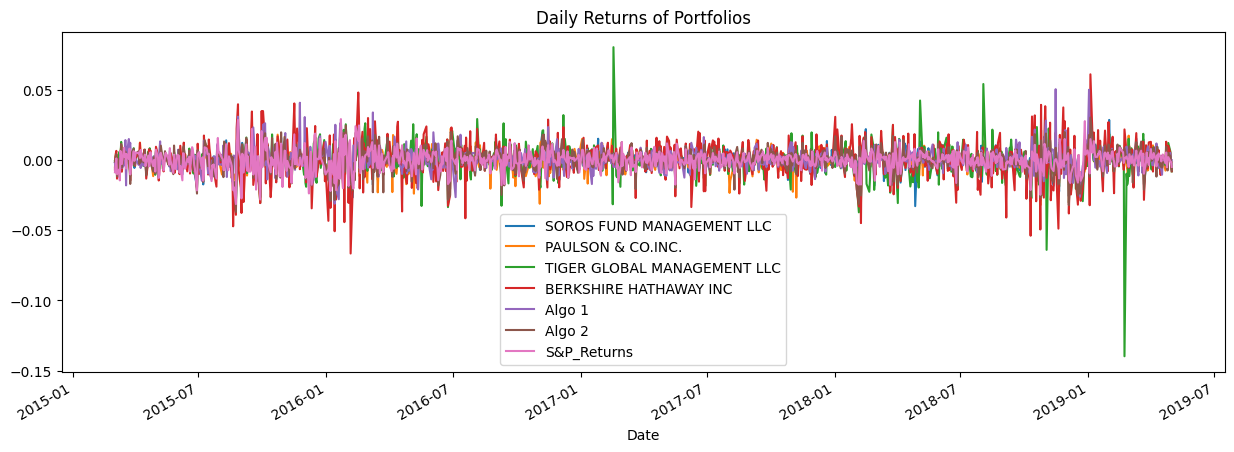

In [16]:
# Plot daily returns of all portfolios
daily_returns_df.plot(figsize=(15,5), title ='Daily Returns of Portfolios')


#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

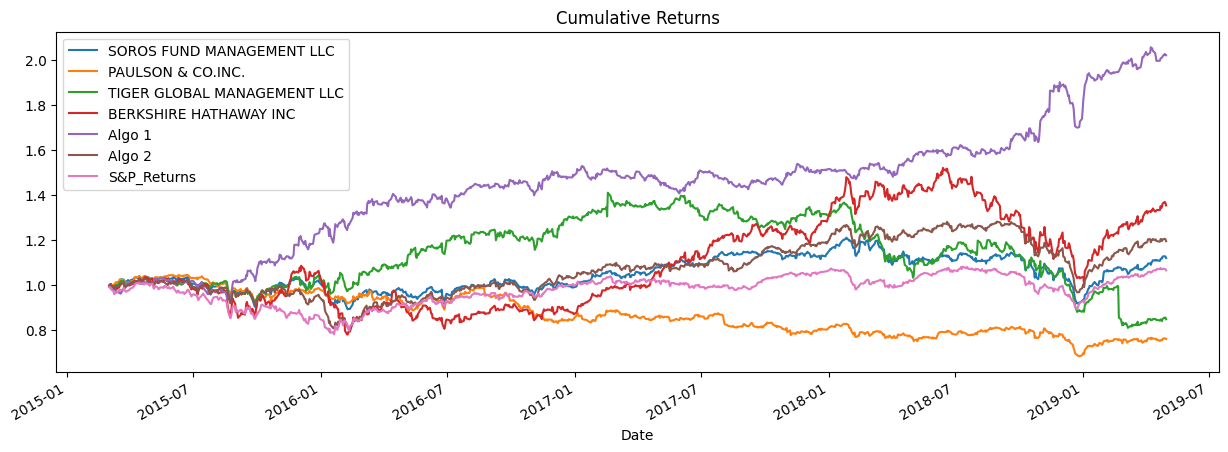

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_returns_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize= (15,5),title ='Cumulative Returns')


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<Axes: title={'center': 'Box Plot'}>

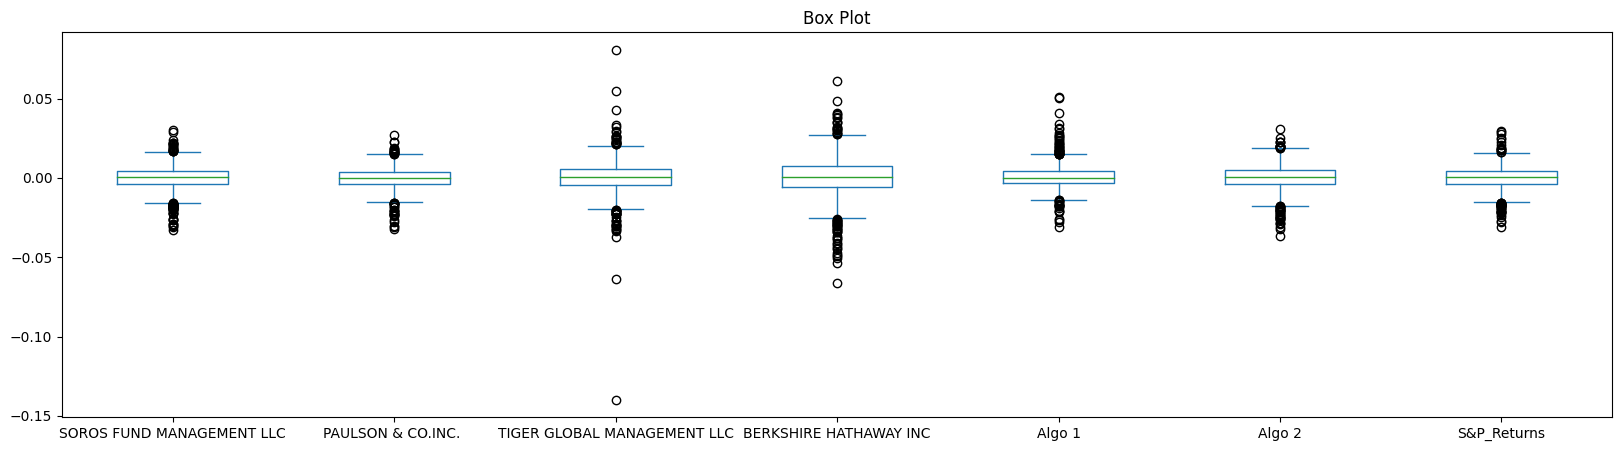

In [18]:
# Box plot to visually show risk
daily_returns_df.plot.box(figsize = (20,5), title = "Box Plot") # Box plot for portfolio returns

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
standard_dev_df = daily_returns_df[['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ','TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1','Algo 2']].std()


### Determine which portfolios are riskier than the S&P TSX 60

In [20]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_std = daily_returns_df["S&P_Returns"].std()


# Determine which portfolios are riskier than the S&P TSX 60
riskier_portfolios = standard_dev_df.loc[standard_dev_df > sp_std]	# Obtaining portfolios with standard deviations higher than that of S&P TSX 60
print(f'Riskier Portfolios than S&P TSX 60:\n{riskier_portfolios}')


Riskier Portfolios than S&P TSX 60:
SOROS FUND MANAGEMENT LLC      0.007828
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
dtype: float64


### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
daily_returns_df.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P_Returns                    0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': 'Rolling Standard Deviation with 21-day window'}, xlabel='Date'>

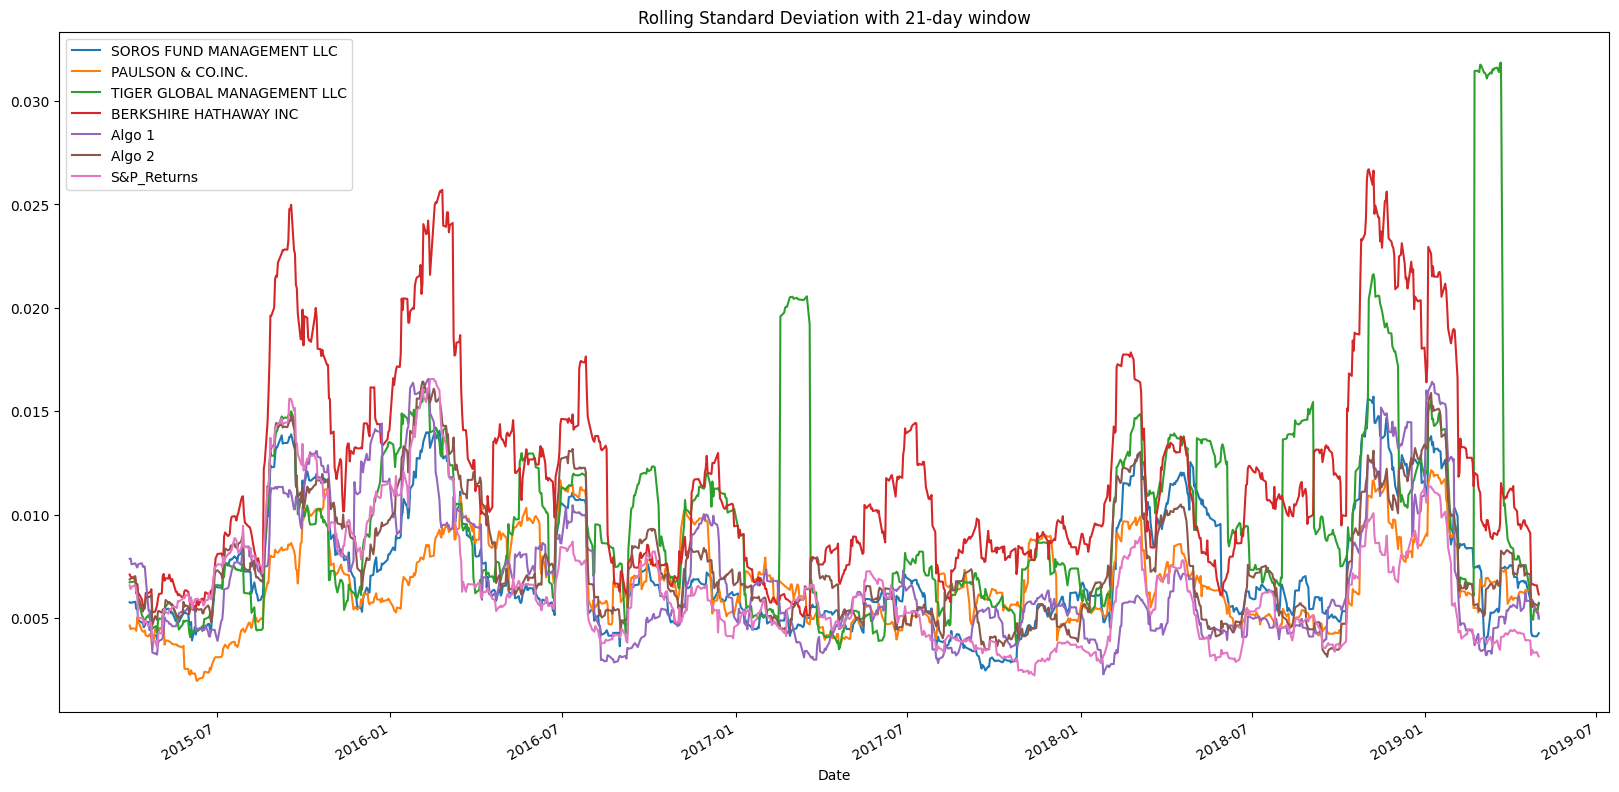

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
std_21 = daily_returns_df.rolling(window = 21).std()
# Plot the rolling standard deviation
std_21.plot(figsize= (20,10), title='Rolling Standard Deviation with 21-day window')

### Calculate and plot the correlation

<Axes: title={'center': 'Correlation of Portfolios'}>

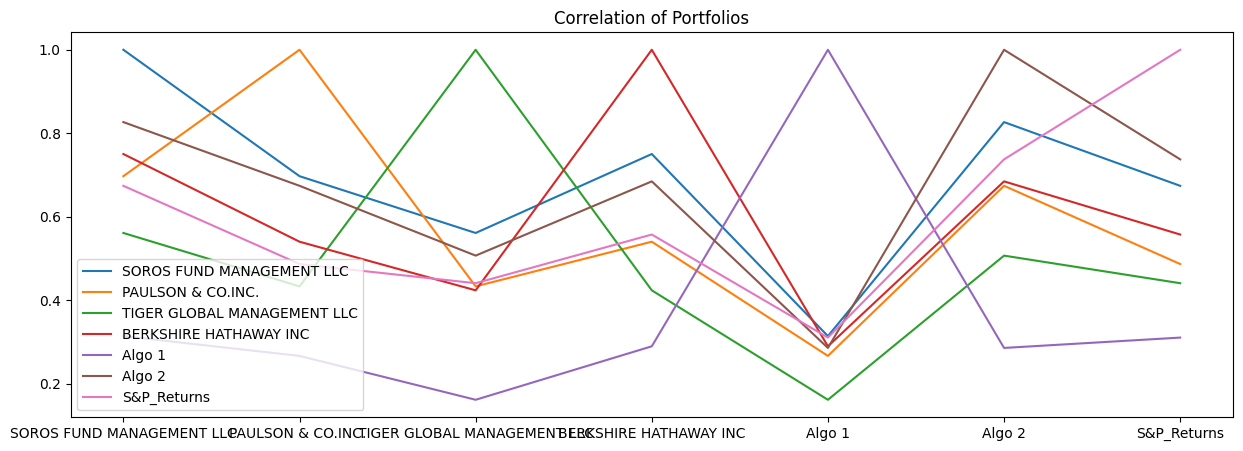

In [23]:
# Calculate the correlation
correlation_matrix = daily_returns_df.corr()

# Display de correlation matrix
correlation_matrix.plot(figsize=(15,5), title='Correlation of Portfolios')

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<Axes: title={'center': 'Beta trend of SOROS FUND MANAGEMENT LLC with 60 days rolling window'}, xlabel='Date'>

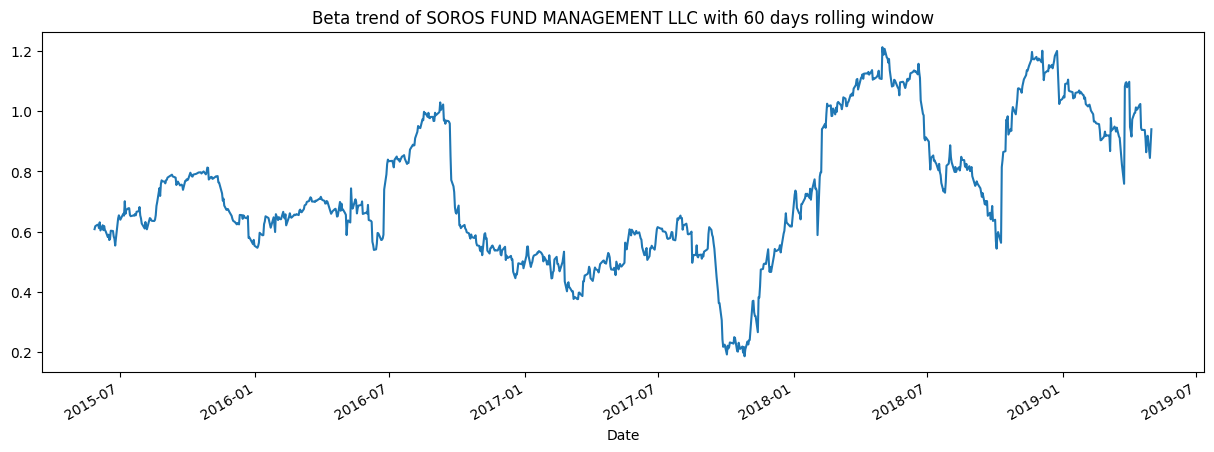

In [25]:
# Calculate covariance of a single portfolio
covarience_soros_rolling = daily_returns_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(daily_returns_df['S&P_Returns'])  # Chosen Portfolio - SOROS FUND MANAGEMENT LLC
                                                                                                                      # Covariance with 60 days Rolling window 

# Calculate variance of S&P TSX
sp_variance_rolling = daily_returns_df['S&P_Returns'].rolling(window = 60).var() # variance of S&P TSX with 60 days Rolling window


# Computing beta
beta = covarience_soros_rolling/sp_variance_rolling



# Plot beta trend
beta.plot(title='Beta trend of SOROS FUND MANAGEMENT LLC with 60 days rolling window', figsize=(15,5))



## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [26]:
# Use `ewm` to calculate the rolling window
daily_returns_df.ewm(halflife = 21).std()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_Returns
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517
...,...,...,...,...,...,...,...
2019-04-25,0.006819,0.006342,0.014811,0.010830,0.006526,0.007500,0.004700
2019-04-26,0.006819,0.006448,0.014764,0.010763,0.006433,0.007418,0.004628
2019-04-29,0.006708,0.006357,0.014575,0.010601,0.006378,0.007304,0.004564


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
sharpe_ratio = (daily_returns_df.mean() * 252) / (daily_returns_df.std() * np.sqrt(252))


<Axes: title={'center': 'Sharpe Ratios'}>

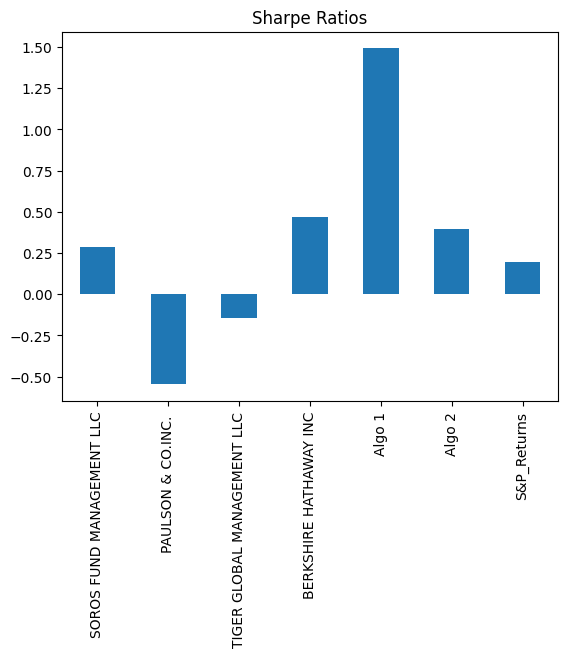

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

The algorithmic strategies have outperform both the market (S&P TSX 60) and the whales portfolios, except Berkshire Hatheway where Algo 2 slacked by a small margin in the average returns over the span of time analyzed (2015-03-03 to 2019-05-01). In terms of sharpe ratios, Algo 1 of the algorithmic porfolios shows the best standing to  invest, being the only portfolio valued close to 1.5.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Reading data from 1st stock
l_historical_csv = Path('l_historical.csv')
l_historical = pd.read_csv(l_historical_csv)


In [31]:
# Reading data from 2nd stock
otex_historical_csv = Path('otex_historical.csv')
otex_historical = pd.read_csv(otex_historical_csv)


In [32]:
# Reading data from 3rd stock
shop_historical_csv =  Path('shop_historical.csv')
shop_historical = pd.read_csv(shop_historical_csv)


In [33]:
# Combine all stocks in a single DataFrame
custom_portfolio = pd.concat([l_historical, otex_historical, shop_historical], axis = 1, join = 'inner')


In [34]:
# Reset Date index

l_historical['Date'] = pd.to_datetime(l_historical['Date']) # Converting 'Date' to datetime format
otex_historical['Date'] = pd.to_datetime(otex_historical['Date']) # Converting 'Date' to datetime format
shop_historical['Date'] = pd.to_datetime(shop_historical['Date']) # Converting 'Date' to datetime format

l_historical.set_index('Date', inplace = True) # setting 'Date' in datetime format as index
otex_historical.set_index('Date', inplace = True) # setting 'Date' in datetime format as index
shop_historical.set_index('Date', inplace = True) # setting 'Date' in datetime format as index



In [35]:
# Reorganize portfolio data by having a column per symbol

custom_portfolio= {} # Initializing a blank dictionary for the creating the required dataframe with data by having a column per symbol

stocks =['L','OTEX','SHOP'] # List of column names intended for the dataframe
i=0 # created for the index to navigate through 'stocks'

dfs =[l_historical, otex_historical, shop_historical] # list of data frames with required values to concatenate

for stock in stocks: 
    df = dfs[i]
    df = df['Close'] # 'df' assigned as the column 'Close' in the dataframe with the index as current value of 'i' out of the list of dataframes 'dfs' 
    custom_portfolio[stock] = df # Created and inserted the key(stock ticker) listed in the list 'stocks' with its values as the column 'Close' of corresponding dataframe into the dictionary
    i = i+1 # increamented to move to next element of the list 'df' in the following loop
    
custom_portfolio = pd.DataFrame(custom_portfolio) #converting the dictionary to the require dataframe
custom_portfolio.head()

,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


<Axes: title={'center': 'Daily returns of stocks in the custom portfolio'}, xlabel='Date'>

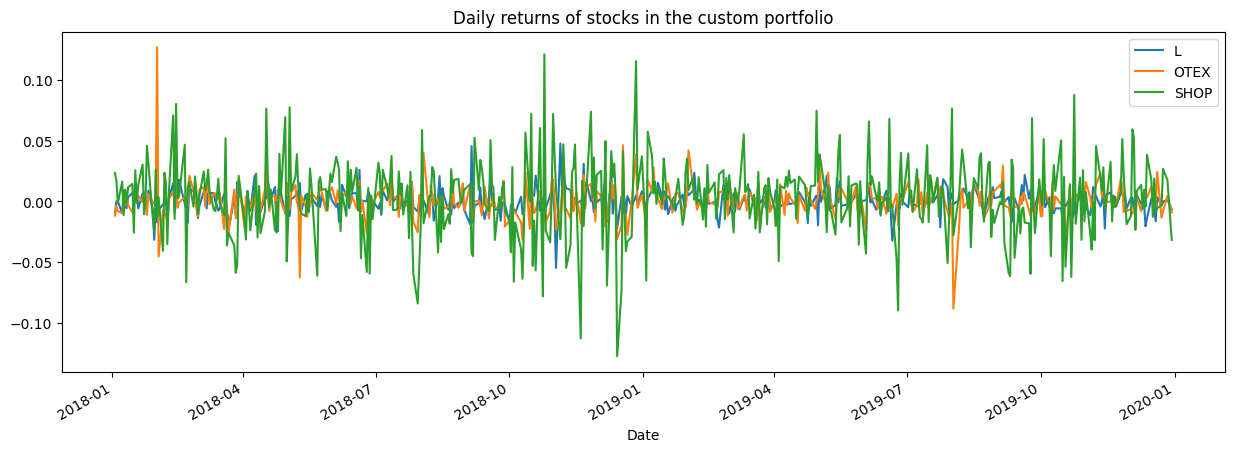

In [36]:
# Calculate daily returns
custom_daily_returns = custom_portfolio.pct_change()

# Drop NAs
custom_daily_returns = custom_daily_returns.dropna()

# Display sample data
custom_daily_returns.plot(figsize= (15,5), title = 'Daily returns of stocks in the custom portfolio')

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = custom_daily_returns.dot(weights)


# Display sample data
custom_daily_returns['Portfolio_Returns'] = portfolio_returns # Assigning the weighted returns to the appended column 'Portfolio_Returns'of dataframe 'custom_daily_returns'

portfolio_returns_df = custom_daily_returns.drop(columns = ['L','OTEX','SHOP']) # Removing extraneous columns in the current dataframe 'custom_daily_returns' and assigning it to a new dataframe

portfolio_returns_df.sample(5) # sample to display data of the required dataframe obtained,

,Portfolio_Returns
Date,
2018-01-08,-0.000997
2019-07-08,0.006458
2019-02-20,-0.004872
2019-11-19,-0.003521
2018-09-14,-0.001612


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [40]:
# Join your returns DataFrame to the original returns DataFrame
combined_retruns_df = pd.concat([daily_returns_df, portfolio_returns_df],axis = 1, join = 'inner')


In [41]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_retruns_df = combined_retruns_df.dropna()
combined_retruns_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_Returns,Portfolio_Returns
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [42]:
# Calculate the annualized `std`
combined_retruns_df.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P_Returns                    0.099121
Portfolio_Returns              0.224346
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': 'Rolling Standard Deviation of Custom Portfolio with 21 days window'}, xlabel='Date'>

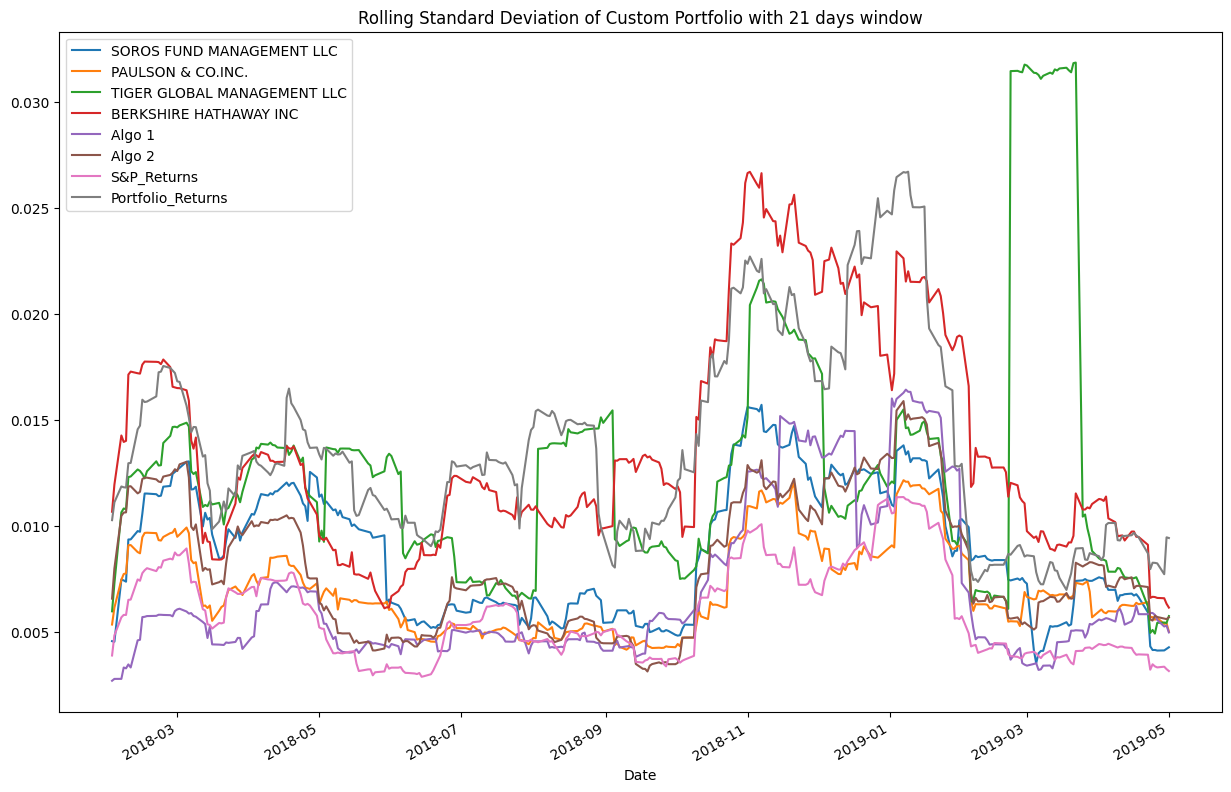

In [43]:
# Calculate rolling standard deviation
combined_retruns__roll_21_std = combined_retruns_df.rolling(window = 21).std()

# Plot rolling standard deviation
combined_retruns__roll_21_std.plot(title='Rolling Standard Deviation of Custom Portfolio with 21 days window', figsize=(15,10))

### Calculate and plot the correlation

<Axes: title={'center': 'Correlation of Portfolios'}>

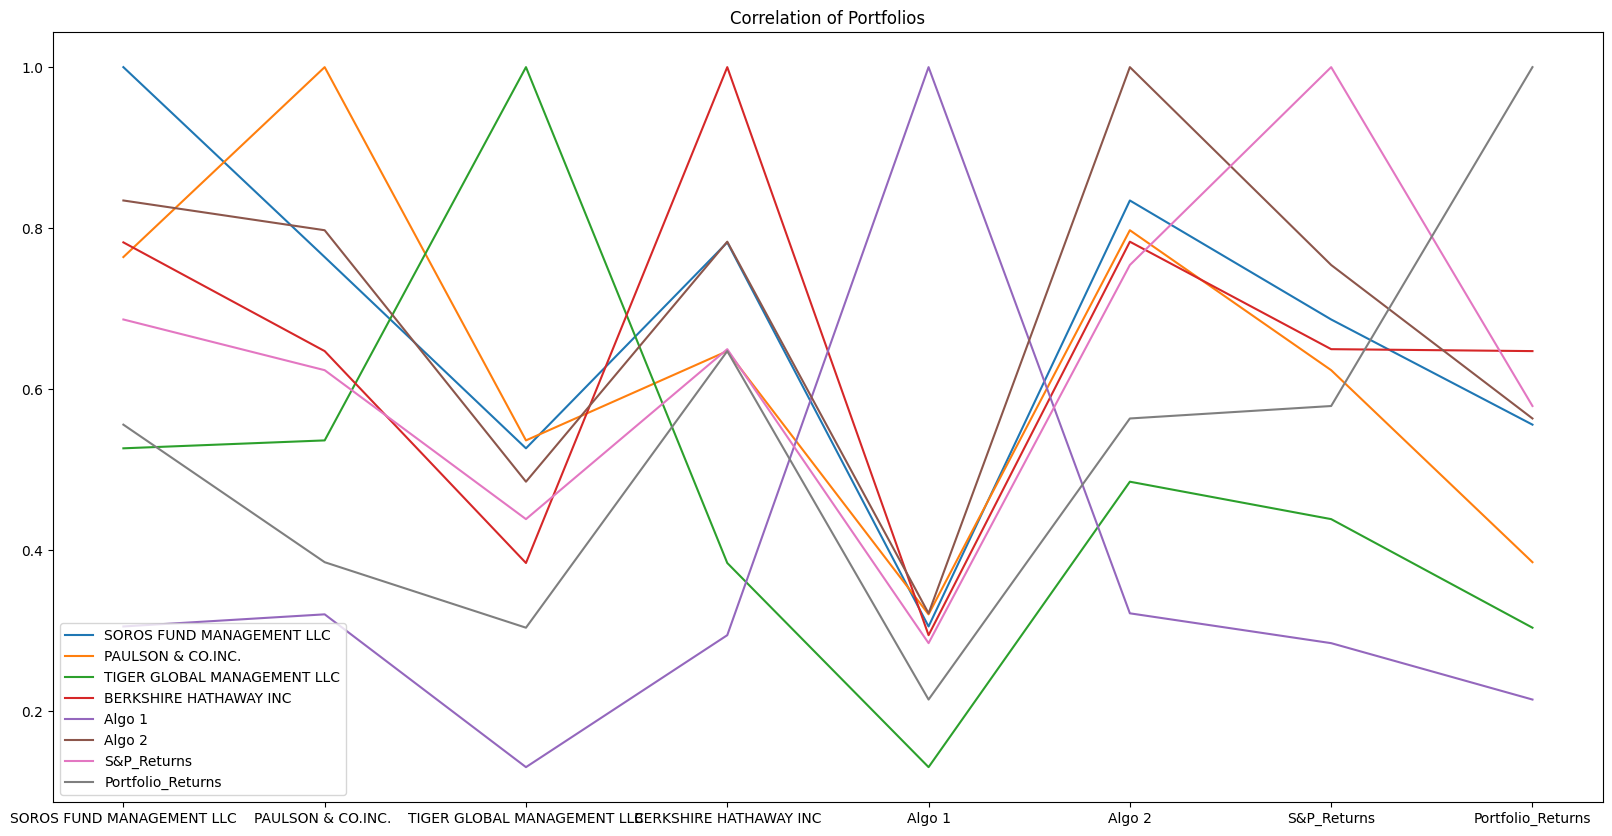

In [44]:
# Calculate and plot the correlation
combined_correlation = combined_retruns_df.corr()
combined_correlation.plot(figsize = (20,10), title ='Correlation of Portfolios')

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<Axes: title={'center': '60-day Rolling Beta of the Custom Portfolio compared to the S&P 60 TSX'}, xlabel='Date'>

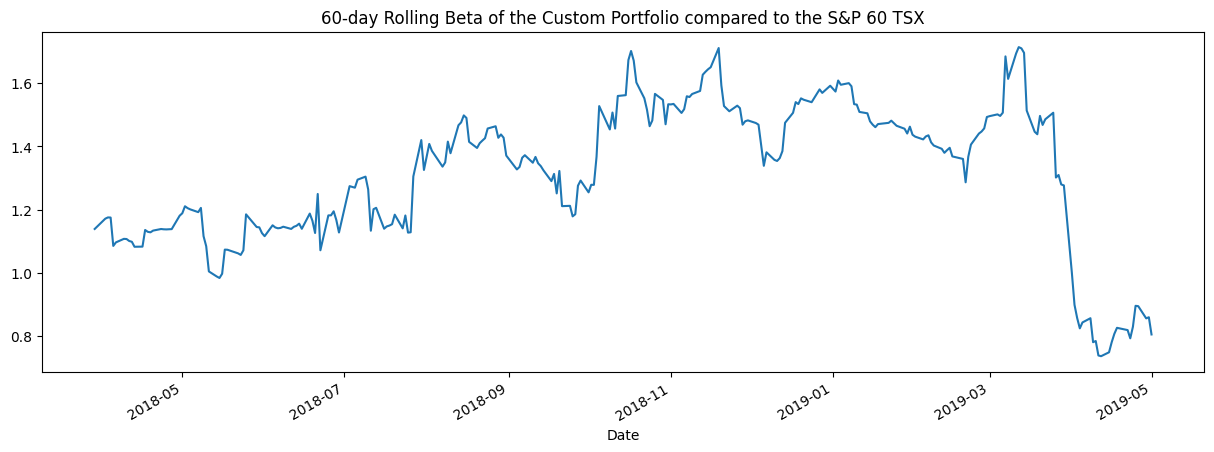

In [45]:
# Calculate and plot Beta
covariance_custom_roll_60 = combined_retruns_df['Portfolio_Returns'].rolling(window =60).cov(combined_retruns_df['S&P_Returns'])
variance_sp_roll_60 = combined_retruns_df['S&P_Returns'].rolling(window = 60).var()
beta_roll_60 = covariance_custom_roll_60/variance_sp_roll_60
beta_roll_60.plot(title= '60-day Rolling Beta of the Custom Portfolio compared to the S&P 60 TSX', figsize=(15,5))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [46]:
# Calculate Annualized Sharpe Ratios
sharpe_annual = (combined_retruns_df.mean() * 252) / (combined_retruns_df.std() * np.sqrt(252))


<Axes: title={'center': 'Sharpe Ratios'}>

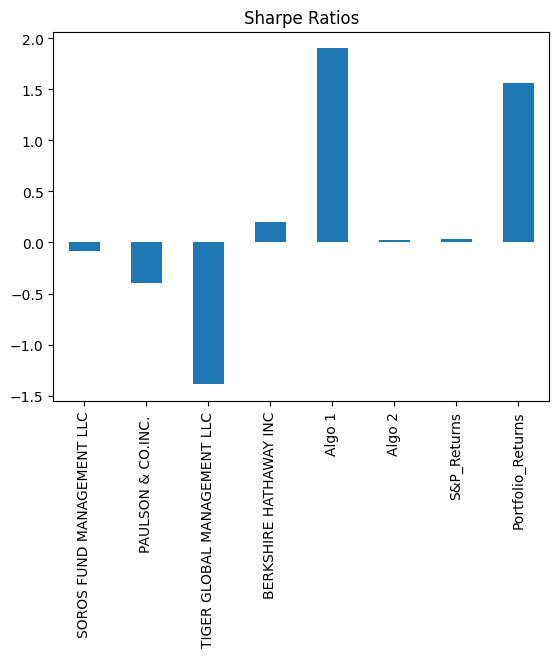

In [47]:
# Visualize the sharpe ratios as a bar plot
sharpe_annual.plot(kind = 'bar',title='Sharpe Ratios')


### How does your portfolio do?

Write your answer here!

The analysis of the custom porfolio along with the other portfolios is conducted during the period from 2018-01-03 till 2019-05-01.
The analysis shows that the custom portfolio designed infact did good during this span, outperforming the maarket and other portfolios with the highest mean returns. The sharpe ratio of this portfolio is only second to 'Algo 1'. The high sharpe ratio of the portfolio, close to 1.5, indicates that it is in good status as an investment where risk is comparitively lesser relative to the high returns it provides.